<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Course/blob/main/4_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install ucimlrepo

In [1]:
!pip install ucimlrepo

#import ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

In [3]:
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Progno

#Get the data set, check and prepare it

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glass = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass.data.features
y = glass.data.targets

# metadata
print(glass.metadata)

# variable information
print(glass.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [5]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
y.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


In [7]:
# Use value_counts() to count unique values
unique_value_counts = y.value_counts()
unique_value_counts

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
dtype: int64

In [8]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
# Use LabelEncoder to convert the target variable to numerical format
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [13]:
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [15]:
X_train.shape

(171, 9)

#Model

In [16]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(9,18)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(18,36)
    self.hidden_layer_to_hidden_layer2 = nn.Linear(36,72)
    self.hidden_layer_to_hidden_layer3 = nn.Linear(72,36)
    self.hidden_layer_to_hidden_layer4 = nn.Linear(36,18)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(18,6)

    #define activation function to ouput layer
    self.output_layer_activation = nn.Softmax(1)

  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer2(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer3(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer4(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    # x = self.output_layer_activation(x)
    return x

#Instantiate model, create tensors and define loss function and optimizer

In [17]:
# Instantiate the model
model = NeuralNetwork()

# Define loss function and optimizer

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

train_losses = []
train_accuracies = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs= 1000

#Train

In [18]:
for epoch in range(epochs):
  #forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs,y_train_tensor)

  #Calculate accuracy
  _,predicted_classes = torch.max(outputs,1)
  correct_predictions = (predicted_classes == y_train_tensor).sum().item()
  accuracy = correct_predictions/len(y_train_tensor)

  #Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Record loss and accuracy
  train_losses.append(loss.item())
  train_accuracies.append(accuracy)

  #Print training loss and accuracy every 10 epochs
  if(epoch+1)%100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f},Accuracy:{accuracy:.4f}')


Epoch [100/1000],Loss:0.9734,Accuracy:0.5497
Epoch [200/1000],Loss:0.8697,Accuracy:0.5556
Epoch [300/1000],Loss:0.7102,Accuracy:0.6784
Epoch [400/1000],Loss:0.6583,Accuracy:0.7368
Epoch [500/1000],Loss:0.5825,Accuracy:0.7485
Epoch [600/1000],Loss:0.5653,Accuracy:0.7602
Epoch [700/1000],Loss:0.5895,Accuracy:0.7544
Epoch [800/1000],Loss:0.5403,Accuracy:0.7719
Epoch [900/1000],Loss:0.5954,Accuracy:0.7368
Epoch [1000/1000],Loss:0.4832,Accuracy:0.7836


#Plots

In [19]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

3.7.1


Text(0, 0.5, 'Loss Values')

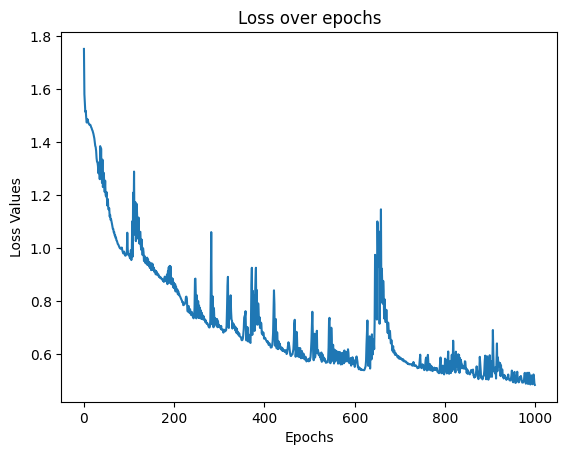

In [20]:
plt.plot(train_losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

Text(0, 0.5, 'Accuracy Values')

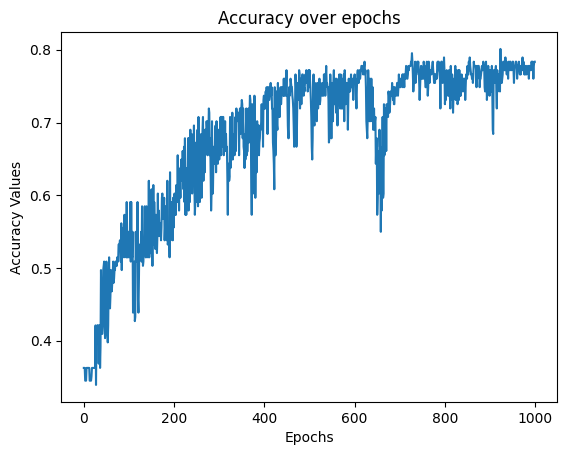

In [21]:
plt.plot(train_accuracies)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Values")

#Test

In [22]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, predicted_test_classes = torch.max(test_outputs, 1)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_tensor, predicted_test_classes.numpy())

print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.6744186046511628


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

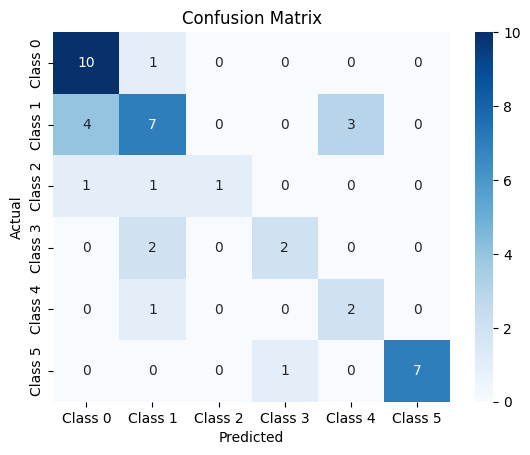

In [26]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, predicted_test_classes.numpy())

# Plot confusion matrix using seaborn
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Trying normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [28]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [31]:
# Instantiate the model
model = NeuralNetwork()

train_losses = []
train_accuracies = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs= 1000

In [32]:
for epoch in range(epochs):
  #forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs,y_train_tensor)

  #Calculate accuracy
  _,predicted_classes = torch.max(outputs,1)
  correct_predictions = (predicted_classes == y_train_tensor).sum().item()
  accuracy = correct_predictions/len(y_train_tensor)

  #Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Record loss and accuracy
  train_losses.append(loss.item())
  train_accuracies.append(accuracy)

  #Print training loss and accuracy every 10 epochs
  if(epoch+1)%100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f},Accuracy:{accuracy:.4f}')


Epoch [100/1000],Loss:0.0390,Accuracy:0.9942
Epoch [200/1000],Loss:0.0006,Accuracy:1.0000
Epoch [300/1000],Loss:0.0003,Accuracy:1.0000
Epoch [400/1000],Loss:0.0001,Accuracy:1.0000
Epoch [500/1000],Loss:0.0001,Accuracy:1.0000
Epoch [600/1000],Loss:0.0001,Accuracy:1.0000
Epoch [700/1000],Loss:0.0000,Accuracy:1.0000
Epoch [800/1000],Loss:0.0000,Accuracy:1.0000
Epoch [900/1000],Loss:0.0000,Accuracy:1.0000
Epoch [1000/1000],Loss:0.0000,Accuracy:1.0000


Text(0, 0.5, 'Loss Values')

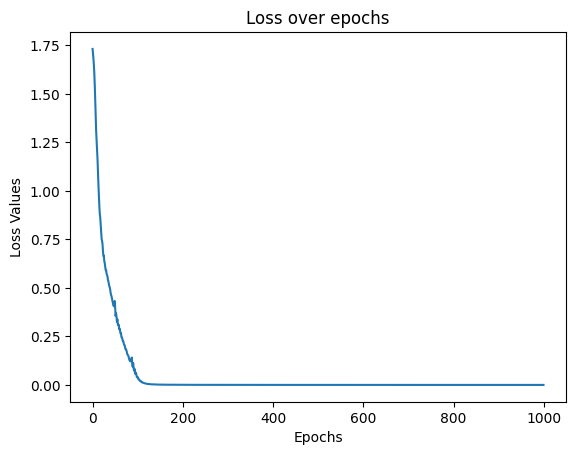

In [33]:
plt.plot(train_losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

Text(0, 0.5, 'Accuracy Values')

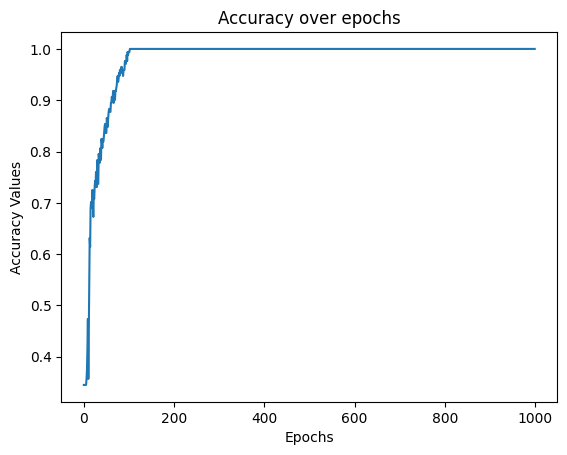

In [34]:
plt.plot(train_accuracies)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Values")

In [35]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, predicted_test_classes = torch.max(test_outputs, 1)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_tensor, predicted_test_classes.numpy())

print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.6976744186046512


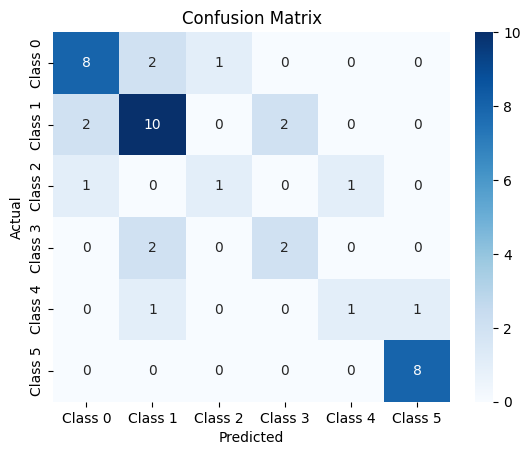

In [36]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, predicted_test_classes.numpy())

# Plot confusion matrix using seaborn
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Trying to improve test accuracy with l1 regularization and l2 regularization

In [37]:
# Instantiate the model
model = NeuralNetwork()

train_losses = []
train_accuracies = []

criterion = nn.CrossEntropyLoss()
# Define your optimizer with L2 regularization (weight_decay parameter)
l1_lambda = 1e-3
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=l1_lambda)
epochs= 1000

In [38]:
for epoch in range(epochs):
  #forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs,y_train_tensor)


  # Calculate L1 regularization term
  l1_reg = torch.tensor(0.0)
  for param in model.parameters():
    l1_reg += torch.norm(param, p=1)

  # Calculate total loss with L1 regularization
  total_loss = loss + l1_reg * l1_lambda

  #Calculate accuracy
  _,predicted_classes = torch.max(outputs,1)
  correct_predictions = (predicted_classes == y_train_tensor).sum().item()
  accuracy = correct_predictions/len(y_train_tensor)

  #Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()

  # Clip gradients using torch.nn.utils.clip_grad_norm_
  max_norm = 1.0 + epoch * 0.1  # You can adjust the max_norm value
  torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
  optimizer.step()

  #Record loss and accuracy
  train_losses.append(loss.item())
  train_accuracies.append(accuracy)

  #Print training loss and accuracy every 10 epochs
  if(epoch+1)%100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f},Accuracy:{accuracy:.4f}')


Epoch [100/1000],Loss:0.2103,Accuracy:0.9181
Epoch [200/1000],Loss:0.0453,Accuracy:0.9825
Epoch [300/1000],Loss:0.0063,Accuracy:1.0000
Epoch [400/1000],Loss:0.0042,Accuracy:1.0000
Epoch [500/1000],Loss:0.0040,Accuracy:1.0000
Epoch [600/1000],Loss:0.0040,Accuracy:1.0000
Epoch [700/1000],Loss:0.0040,Accuracy:1.0000
Epoch [800/1000],Loss:0.0040,Accuracy:1.0000
Epoch [900/1000],Loss:0.0040,Accuracy:1.0000
Epoch [1000/1000],Loss:0.0040,Accuracy:1.0000


Text(0, 0.5, 'Loss Values')

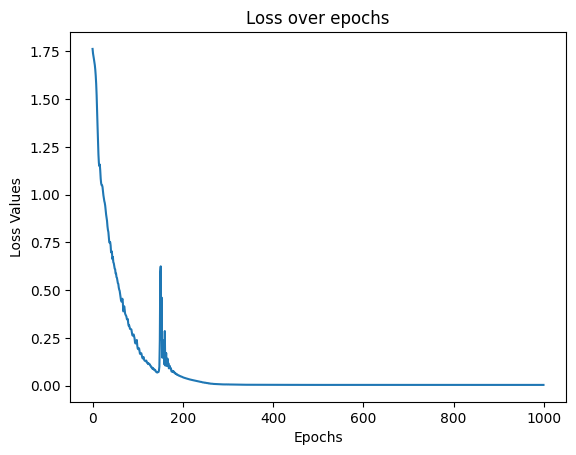

In [39]:
plt.plot(train_losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

Text(0, 0.5, 'Accuracy Values')

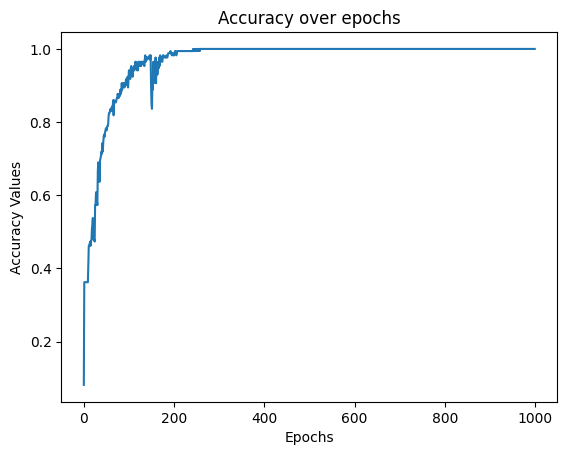

In [40]:
plt.plot(train_accuracies)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Values")

In [41]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, predicted_test_classes = torch.max(test_outputs, 1)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_tensor, predicted_test_classes.numpy())

print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.7906976744186046


#Adding Early Stopping

In [42]:
# Instantiate the model
model = NeuralNetwork()

train_losses = []
train_accuracies = []

criterion = nn.CrossEntropyLoss()
# Define your optimizer with L2 regularization (weight_decay parameter)
l1_lambda = 1e-3
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=l1_lambda)
epochs= 1000

In [43]:
for epoch in range(epochs):
  #forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs,y_train_tensor)


  # Calculate L1 regularization term
  l1_reg = torch.tensor(0.0)
  for param in model.parameters():
    l1_reg += torch.norm(param, p=1)

  # Calculate total loss with L1 regularization
  total_loss = loss + l1_reg * l1_lambda

  #Calculate accuracy
  _,predicted_classes = torch.max(outputs,1)
  correct_predictions = (predicted_classes == y_train_tensor).sum().item()
  accuracy = correct_predictions/len(y_train_tensor)

  #Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()

  # Clip gradients using torch.nn.utils.clip_grad_norm_
  max_norm = 1.0 + epoch * 0.1  # You can adjust the max_norm value
  torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
  optimizer.step()

  #Record loss and accuracy
  train_losses.append(loss.item())
  train_accuracies.append(accuracy)

  #Print training loss and accuracy every 10 epochs
  if(epoch+1)%100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}],Loss:{loss.item():.4f},Accuracy:{accuracy:.4f}')

  # Check if the last 50 entries are all less than 0.005
  if all(entry < 0.005 for entry in train_losses[-50:]):
    print("All the last 50 entries are less than 0.005.")
    break


Epoch [100/1000],Loss:0.1142,Accuracy:0.9766
Epoch [200/1000],Loss:0.0197,Accuracy:0.9942
Epoch [300/1000],Loss:0.5078,Accuracy:0.8187
Epoch [400/1000],Loss:0.0205,Accuracy:0.9942
Epoch [500/1000],Loss:0.0120,Accuracy:1.0000
Epoch [600/1000],Loss:0.0055,Accuracy:1.0000
Epoch [700/1000],Loss:0.0049,Accuracy:1.0000
All the last 50 entries are less than 0.005.


Text(0, 0.5, 'Loss Values')

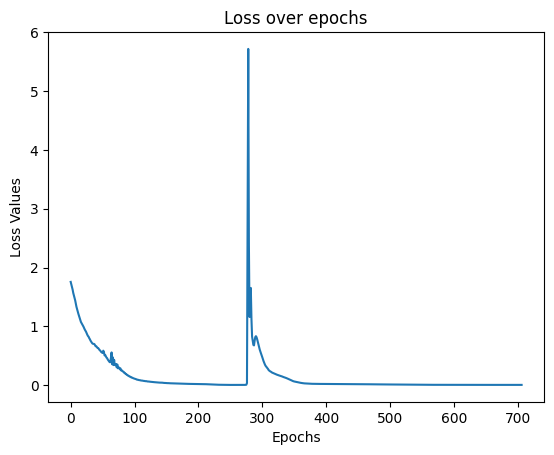

In [44]:
plt.plot(train_losses)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

Text(0, 0.5, 'Accuracy Values')

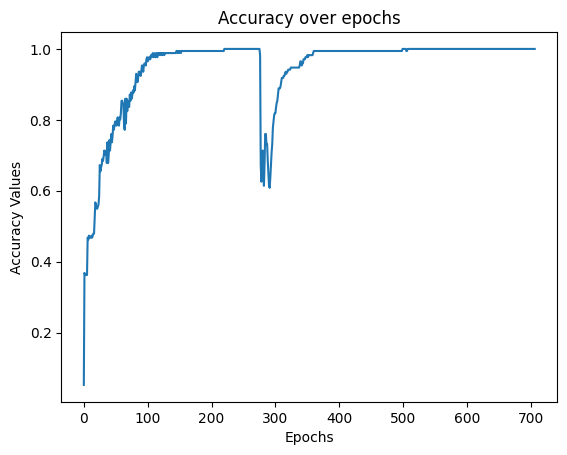

In [45]:
plt.plot(train_accuracies)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Values")

In [46]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, predicted_test_classes = torch.max(test_outputs, 1)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_tensor, predicted_test_classes.numpy())

print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.7906976744186046
